<a href="https://colab.research.google.com/github/arjun1131/Building-ML-models-from-Stratch/blob/main/Lasso_Regression_from_Stratch_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lasso Regression

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.It uses L1 regularization to prevent overfitting.



In [1]:
#Importing Numpy Library
import numpy as np

In [15]:
#Creting class for Lasso Regression
class lasso():
  
  #Hyper parameters initialization function
  def __init__(self, alpha, iterations , lamda):

    self.alpha = alpha
    self.iterations = iterations
    self.lamda = lamda
  
  #Fitting data into model function
  def fit(self , x , y):

    #Finding number of input features - number of columns in data, number of data points - - number of rows in data
    self.m , self.n = x.shape
    
    #Initializing model parameters
    self.weights = np.zeros(self.n)
    self.bias = 0

    #Input features 
    self.x = x
    self.y = y

    #Gradient Descent Implementation

    for i in range(self.iterations):
      self.update_parameters()

  #Function for updating model parameters
  def update_parameters(self):

    #Calculating prediction for initial model parameters
    y_pred = self.predict(self.x)

    #Creating array for dw gradients
    dw = np.zeros(self.n)

    #Calculating gradients
    for i in range(self.n):
      
      if self.weights[i] > 0:
        dw[i] = (-(2*(self.x[:,i]).dot(self.y - y_pred)) + self.lamda)/self.m
      
      else:
        dw[i] = (-(2*(self.x[:,i]).dot(self.y - y_pred)) - self.lamda)/self.m
        
    db = -2 * np.sum(self.y - y_pred)/self.m

    #Updating model parameters

    self.weights = self.weights - (self.alpha * dw)
    self.bias = self.bias - (self.alpha * db)


  #Function for predict target value
  def predict(self , x):

    return x.dot(self.weights) + self.bias

#Implementation of Lasso Regression

In [4]:
#Importing libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [5]:
#Loading data into Pandas Data frame
data = pd.read_csv('/content/drive/MyDrive/ML Datasets/salary_data.csv')

In [6]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


#Splitting features & target

In [7]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [8]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

#Splitting training & testing data

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.15 , random_state = 2)

In [12]:
print (x_train.shape , x_test.shape)

(25, 1) (5, 1)


#Model Training

In [16]:
#Creating instance of user defined class lasso

reg = lasso(alpha = 0.01 , iterations = 1000 , lamda = 0.002)

In [17]:
#Fitting data into model
reg.fit(x_train , y_train)

In [19]:
#Printing model parameters

print ('Weight = ',reg.weights[0])
print ('Bias = ',reg.bias)

Weight =  9667.389232815258
Bias =  24223.747285798127


#Model Evaluation

In [20]:
#Prediction on Training data
train_prediction = reg.predict(x_train)
print(train_prediction)

[ 82228.08268269 103496.33899488  53225.91498424  43558.52575143
  89961.99406894  52259.17606096 117030.68392082  62893.30421706
  45492.00359799  61926.56529378  73527.43237316 123797.8563838
 111230.25038114  75460.91021972  38724.83113502  55159.39283081
 116063.94499754 108330.03361129  81261.34375941  62893.30421706
 100596.12222504 125731.33423036  63860.04314034  71593.95452659
  55159.39283081]


In [24]:
#Finding r2 score , mean absolute error
train_r2_score = r2_score(y_train , train_prediction)
train_error = mean_absolute_error(y_train , train_prediction)
print ('R2 score of training data : ', train_r2_score)
print ('Error on training data : ', train_error)

R2 score of training data :  0.9580985501619433
Error on training data :  4390.003879050575


In [21]:
#Prediction on Test data
test_prediction = reg.predict(x_test)
print(test_prediction)

[36791.35328846 34857.87544189 67726.99883347 59993.08744721
 92862.21083879]


In [25]:
#Finding r2 score , mean absolute error
test_r2_score = r2_score(y_test , test_prediction)
test_error = mean_absolute_error(y_test , test_prediction)
print ('R2 score of testing data : ', test_r2_score)
print ('Error on testing data : ', test_error)

R2 score of testing data :  0.909264357331982
Error on testing data :  5745.929342308411


#Visualizing prediction on training & testing data

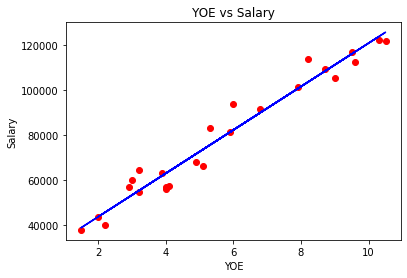

In [26]:
import matplotlib.pyplot as plt
plt.scatter(x_train , y_train , color = 'red')
plt.plot(x_train , train_prediction, color = 'blue')
plt.xlabel('YOE')
plt.ylabel('Salary')
plt.title('YOE vs Salary')
plt.show()

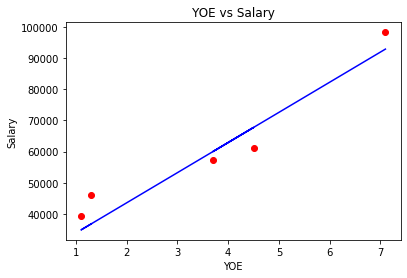

In [27]:
plt.scatter(x_test , y_test , color = 'red')
plt.plot(x_test , test_prediction, color = 'blue')
plt.xlabel('YOE')
plt.ylabel('Salary')
plt.title('YOE vs Salary')
plt.show()